In [2]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [4]:
%matplotlib inline

In [5]:
shp_path = "India-shp/3e11a5e.shp"
sf = shp.Reader(shp_path)

In [6]:
len(sf.shapes())

36

In [7]:
sf.records()[1]

Record #1: [2, 6864602, 'STATE', '02', 'Himachal Pradesh', 55673, 77629498979.5547, 1896926.47133996]

In [8]:
for i in range(36):
    print(sf.records()[i])

Record #0: [1, 10086292, 'STATE', '05', 'Uttarakhand', 53483, 71367545349.2012, 1975339.13208196]
Record #1: [2, 6864602, 'STATE', '02', 'Himachal Pradesh', 55673, 77629498979.5547, 1896926.47133996]
Record #2: [3, 12541302, 'STATE', '01', 'Jammu & Kashmir', 222236, 330223217396.211, 4043259.29825283]
Record #3: [4, 243247, 'UNION TERRITORY', '25', 'Daman & Diu', 111, 162615274.394531, 97942.8162261239]
Record #4: [5, 60439692, 'STATE', '24', 'Gujarat', 196244, 219798054662.182, 5028877.90025406]
Record #5: [6, 343709, 'UNION TERRITORY', '26', 'Dadra & Nagar Haveli', 491, 555788889.816406, 203537.692802412]
Record #6: [7, 72626809, 'STATE', '23', 'Madhya Pradesh', 308252, 368646504426.605, 7580130.90422492]
Record #7: [8, 84580777, 'STATE', '28', 'Andhra Pradesh', 160205, 174153607042.115, 4837340.01767948]
Record #8: [9, 33406061, 'STATE', '32', 'Kerala', 38863, 40502030012.2979, 1765212.54453443]
Record #9: [10, 64473, 'UNION TERRITORY', '31', 'Lakshadweep', 30, 220671404.203125, 281

In [9]:
sf.records()[1][4]

'Himachal Pradesh'

In [10]:
sf.records()[25]

Record #25: [26, 1978502, 'STATE', '13', 'Nagaland', 16579, 20862021506.5078, 1055330.88130454]

In [11]:
sf.records()[0]

Record #0: [1, 10086292, 'STATE', '05', 'Uttarakhand', 53483, 71367545349.2012, 1975339.13208196]

In [12]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [13]:
df = read_shapefile(sf)
df.shape

(36, 9)

In [14]:
df.sample(5)

,OBJECTID,TOT_P,State_UT,State_Code,State_Name,Area,Shape__Are,Shape__Len,coords
14,15,16787941,UNION TERRITORY,07,NCT of Delhi,1483,1.936353e+09,2.758352e+05,"[(77.1752300000001, 28.4044700000001), (77.175..."
8,9,33406061,STATE,32,Kerala,38863,4.050203e+10,1.765213e+06,"[(77.09636, 8.29054000000002), (77.08656000000..."
18,19,61095297,STATE,29,Karnataka,191791,2.066369e+11,4.536560e+06,"[(76.84753, 11.5835700000001), (76.84705000000..."
22,23,1247953,UNION TERRITORY,34,Pondicherry,20,5.598098e+08,5.224287e+05,"[(79.80685, 11.83633), (79.80598, 11.83644), (..."
29,30,2966889,STATE,17,Meghalaya,22429,2.763074e+10,1.347092e+06,"[(92.4006600000001, 25.0358600000001), (92.400..."


In [27]:
df[df.State_Name=='Orissa'].iloc[0,-1]    ## Coordinates of Orissa

[(81.5630800000001, 17.8254200000001),
 (81.5626600000001, 17.82505),
 (81.5387200000001, 17.82036),
 (81.53445, 17.8195200000001),
 (81.5200300000001, 17.8152000000001),
 (81.50505, 17.8151),
 (81.49679, 17.81204),
 (81.4945700000001, 17.8112200000001),
 (81.4921600000001, 17.81134),
 (81.4899, 17.81145),
 (81.4893000000001, 17.8119100000001),
 (81.48787, 17.8130100000001),
 (81.4877900000001, 17.81304),
 (81.4874300000001, 17.81331),
 (81.4858600000001, 17.81532),
 (81.4842300000001, 17.8174000000001),
 (81.4833, 17.81859),
 (81.4827900000001, 17.82075),
 (81.4826400000001, 17.82136),
 (81.4823600000001, 17.8225400000001),
 (81.4819600000001, 17.82424),
 (81.48143, 17.82646),
 (81.4813100000001, 17.8267000000001),
 (81.48121, 17.8269),
 (81.4808, 17.82773),
 (81.4804500000001, 17.82843),
 (81.4798500000001, 17.82964),
 (81.4793900000001, 17.83057),
 (81.47934, 17.8306700000001),
 (81.4788100000001, 17.8317300000001),
 (81.4785600000001, 17.83187),
 (81.4755500000001, 17.8334600000001

In [28]:
df['State_Name']

0                   Uttarakhand
1              Himachal Pradesh
2               Jammu & Kashmir
3                   Daman & Diu
4                       Gujarat
5          Dadra & Nagar Haveli
6                Madhya Pradesh
7                Andhra Pradesh
8                        Kerala
9                   Lakshadweep
10                       Sikkim
11                  West Bengal
12                    Jharkhand
13                        Bihar
14                 NCT of Delhi
15                      Haryana
16                   Chandigarh
17                       Punjab
18                    Karnataka
19                  Maharashtra
20                          Goa
21    Andaman & Nicobar Islands
22                  Pondicherry
23                      Mizoram
24                      Manipur
25                     Nagaland
26            Arunachal Pradesh
27                        Assam
28                      Tripura
29                    Meghalaya
30                       Orissa
31      

In [29]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(84.20620944684994, 20.482073668816867)

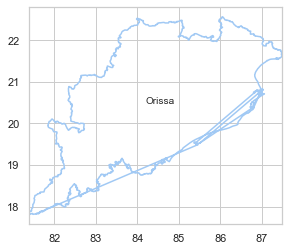

In [30]:
state1 = 'Orissa'
state_name = df[df.State_Name==state1].index.to_numpy()[0]
plot_shape(state_name, state1)

In [19]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

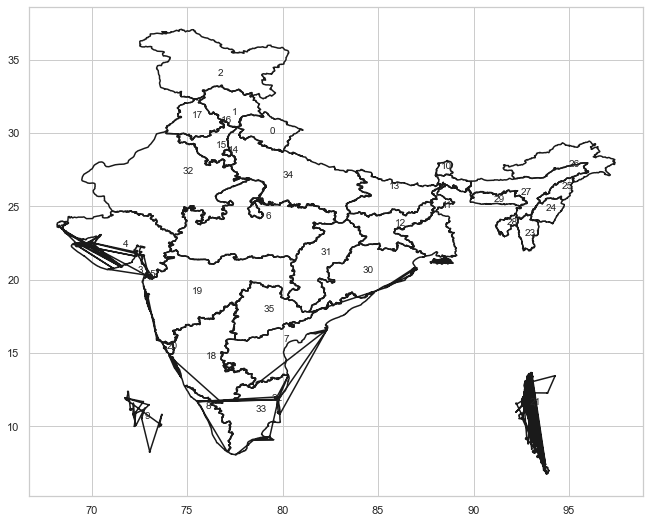

In [20]:
plot_map(sf)

In [21]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


In [22]:
plot_map2(25, sf, x_lim, y_lim)

NameError: name 'x_lim' is not defined

In [ ]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
plot_map_fill(0, sf, x_lim, y_lim, color='g')